In [ ]:
図9.12のプロット

In [1]:
#計算とグラフプロットに必要なモジュールの読み込み
import numpy as np
from control import matlab
from matplotlib import pyplot as plt
from scipy import arange 

In [2]:
#1次遅れ系のパラメータと比例ゲイン，積分ゲイン，微分ゲインのパラメータを与える
a = 1
b = 1

Kp = 1
Ki = 0.5
Kd1 = 1
Kd2 = 3
Kd3 = 8

#目標値から出力までの伝達関数G_{yr}(s)の分子・分母多項式を与える
num0 = [0, b] #K_{p}=0, K_{i}=0, K_{d} = 0の場合の分子多項式
den0 = [1, a] #K_{p}=0, K_{i}=0, K_{d} = 0の場合の分母多項式
num1 = [b * Kd1, b * Kp, b * Ki] #K_{p}=1, K_{i}=0.5, K_{d} = 1の場合の分子多項式
den1 = [1 + b * Kd1, a + b * Kp, b * Ki] #K_{p}=1, K_{i}=0.5, K_{d} = 1の場合の分母多項式
num2 = [b * Kd2, b * Kp, b * Ki] #K_{p}=1, K_{i}=0.5, K_{d} = 3の場合の分子多項式
den2 = [1 + b * Kd2, a + b * Kp, b * Ki] #K_{p}=1, K_{i}=0.5, K_{d} = 3の場合の分母多項式
num3 = [b * Kd3, b * Kp, b * Ki] #K_{p}=1, K_{i}=0.5, K_{d} = 8の場合の分子多項式
den3 = [1 + b * Kd3, a + b * Kp, b * Ki] #K_{p}=1, K_{i}=0.5, K_{d} = 8の場合の分母多項式

#伝達関数表現を与える
sys0 = matlab.tf(num0, den0) #K_{p}=0, K_{i}=0, K_{d} = 0の場合の伝達関数表現
sys1 = matlab.tf(num1, den1) #K_{p}=1, K_{i}=0.5, K_{d} = 1の場合の伝達関数表現
sys2 = matlab.tf(num2, den2) #K_{p}=1, K_{i}=0.5, K_{d} = 3の場合の伝達関数表現
sys3 = matlab.tf(num3, den3) #K_{p}=1, K_{i}=0.5, K_{d} = 8の場合の伝達関数表現

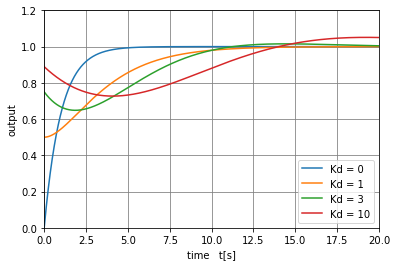

In [3]:
#時間変数の定義
t = arange(0, 20, 0.01)

#ステップ応答の計算
y0, t0 = matlab.step(sys0,t) #K_{p}=0, K_{i}=0, K_{d} = 0の場合のステップ応答
y1, t1 = matlab.step(sys1,t) #K_{p}=1, K_{i}=0.5, K_{d} = 1の場合のステップ応答
y2, t2 = matlab.step(sys2,t) #K_{p}=1, K_{i}=0.5, K_{d} = 3の場合のステップ応答
y3, t3 = matlab.step(sys3,t) #K_{p}=1, K_{i}=0.5, K_{d} = 8の場合のステップ応答

#図9.12のプロット
plt.plot(t0, y0, label = "Kd = 0") #K_{p}=0, K_{i}=0, K_{d} = 0の場合のプロット
plt.plot(t1, y1, label = "Kd = 1") #K_{p}=1, K_{i}=0.5, K_{d} = 1の場合のプロット
plt.plot(t2, y2, label = "Kd = 3") #K_{p}=1, K_{i}=0.5, K_{d} = 3の場合のプロット
plt.plot(t3, y3, label = "Kd = 10") #K_{p}=1, K_{i}=0.5, K_{d} = 8の場合のプロット
plt.xlim([0,20]) #横軸（時間軸の範囲の指定）
plt.ylim([0,1.2]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("output") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show() #グラフの表示